In [1]:
import torch

In [2]:
import torchaudio

In [3]:
import os
import requests
import numpy as np

In [4]:
bundle = torchaudio.pipelines.HUBERT_BASE

In [5]:
model = bundle.get_model()

In [6]:
waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

NameError: name 'waveform' is not defined

In [ ]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

2.0.0
2.0.0
cpu


In [ ]:
import IPython
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

SPEECH_FILE = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")


100.0%


In [ ]:
SPEECH_FILE

'/Users/shraymathur/.cache/torch/hub/torchaudio/tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav'

In [ ]:
waveform, sample_rate = torchaudio.load('/Users/shraymathur/MyFolders/UT/Research/videos/video_url_1652095006662_6662_119dab67_1630573847545.wav')

In [ ]:
waveform.shape

torch.Size([2, 187618])

In [ ]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

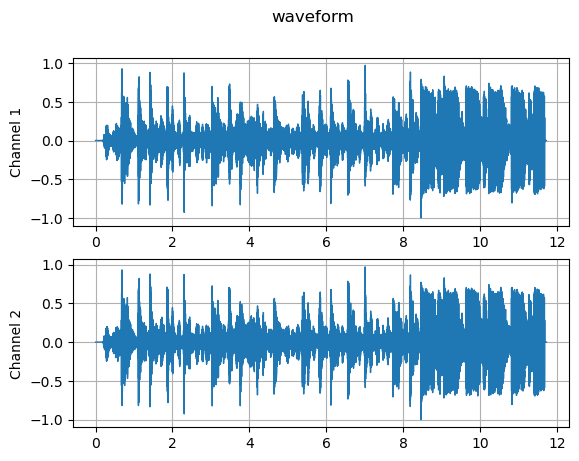

In [ ]:
plot_waveform(waveform, sample_rate)

In [ ]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H

print("Sample Rate:", bundle.sample_rate)

print("Labels:", bundle.get_labels())

Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [ ]:
model = bundle.get_model().to(device)

print(model.__class__)

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls960.pth" to /Users/shraymathur/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls960.pth
10.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

22.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

34.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To chan

In [ ]:
IPython.display.Audio('/Users/shraymathur/MyFolders/UT/Research/videos/video_url_1652095006662_6662_119dab67_1630573847545.wav')

In [ ]:
SPEECH_FILE = '/Users/shraymathur/MyFolders/UT/Research/videos/video_url_1652095006662_6662_119dab67_1630573847545.wav'

In [ ]:
waveform, sample_rate = torchaudio.load(SPEECH_FILE)
waveform = waveform.to(device)

if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

In [ ]:
waveform.shape

torch.Size([2, 187618])

In [ ]:
bundle.sample_rate

16000

In [ ]:
waveform.shape

torch.Size([2, 187618])

In [ ]:
features[0].shape

torch.Size([2, 586, 768])

In [ ]:
with torch.inference_mode():
    features, _ = model.extract_features(waveform)

In [ ]:
waveform.shape, len(features), len(features[0])

(torch.Size([2, 187618]), 12, 2)

In [ ]:
fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu(), interpolation="nearest")
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

In [ ]:
len(features)

12

In [ ]:
features[11].shape

torch.Size([2, 586, 768])

In [ ]:
features[11][0].mean(axis = 0).shape

torch.Size([768])

In [ ]:
torch.mean(torch.stack(features).shape)

torch.Size([12, 2, 586, 768])

In [ ]:
torch.mean(features[0], axis = 0).shape

torch.Size([586, 768])

In [ ]:
torch.mean(features[1], axis = 0).shape

torch.Size([586, 768])

In [ ]:
torch.mean(features[0], axis = 0) + torch.mean(features[1], axis = 0) + 

In [ ]:
(torch.mean(features[0], axis = 0) + torch.mean(features[1], axis = 0)).shape

torch.Size([586, 768])

In [ ]:
audio_embed = torch.zeros([586, 768])
for feat in features:
    audio_embed += torch.mean(feat, axis = 0)

audio_embed = audio_embed.mean(axis = 0)

torch.Size([768])

In [ ]:
test = np.zeros((2,3))

In [ ]:
test + [[1, 2, 3], [3, 4, 5]]

array([[1., 2., 3.],
       [3., 4., 5.]])